#Uygulama 3: Fashion MNIST Temel Sınıflandırma

Bu uygulamanın amacı, Fashion MNIST veri setini kullanarak bir derin öğrenme modeli eğitmektir. Fashion MNIST, 10 farklı giysi sınıfına ait 70.000 adet 28x28 piksel boyutunda gri tonlamalı görüntüden oluşur. Veri seti, 60.000 eğitim görüntüsü ve 10.000 test görüntüsü olmak üzere ikiye ayrılmıştır.


<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>

**Veri Toplama ve Ön İşleme**

İlgili kütüphanelerin kurulması ve içe aktarılması

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


**Veri Setinin Yüklenmesi**<br>

Fashion MNIST veri seti, TensorFlow ve Keras ile doğrudan yüklenebilir. Aşağıdaki kod, veri setini yükler ve eğitim ve test setlerine ayırır.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['Tişört/üst', 'Pantolon', 'Kazak', 'Elbise', 'Kaban',
               'Sandalet', 'Gömlek', 'Spor Ayakkabı', 'Çanta', 'Bot']


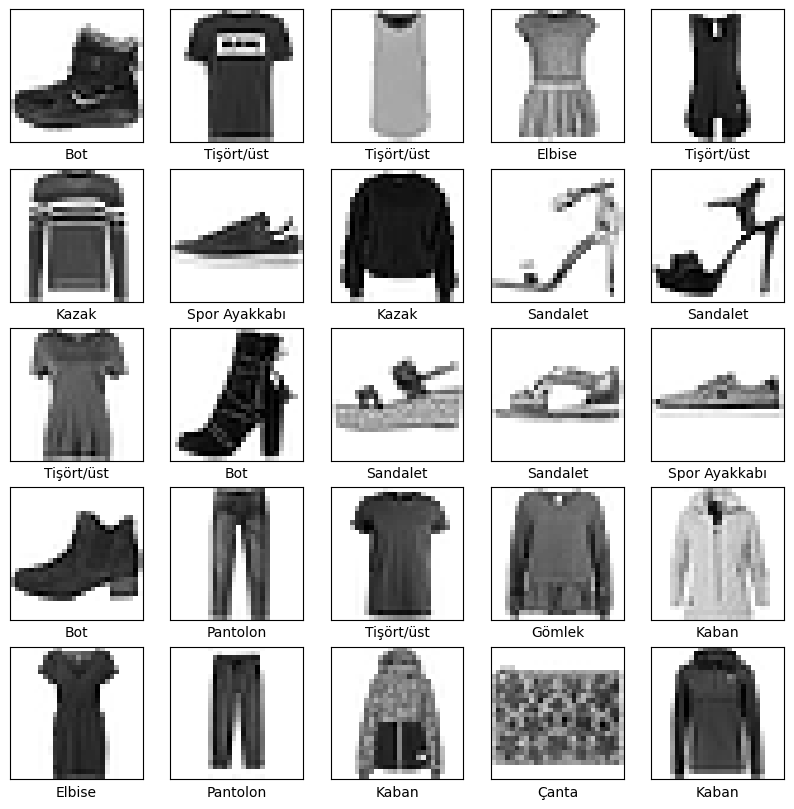

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Veri ön işleme**

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0


**Modelin Oluşturulması**<br>
Aşağıdaki kod, bir derin öğrenme modeli oluşturur. Bu model, iki tam bağlantılı (dense) katmandan oluşur. İlk katman, görüntülerin piksellerini tek bir diziye düzleştirir. İkinci katman, 128 düğüm (veya nöron) içerir ve üçüncü (son) katman, 10 düğüm içerir. Her düğüm, 10 giysi sınıfından birine karşılık gelir.

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

**Modelin Derlenmesi**<br>

Modeli derlemek için, kayıp fonksiyonu, optimize edici ve metrikler belirlenir. Bu uygulamada, kayıp fonksiyonu olarak SparseCategoricalCrossentropy, optimize edici olarak Adam ve metrik olarak accuracy kullanılır.

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Modelin Eğitilmesi**<br>

Modeli eğitmek için, eğitim görüntülerini ve etiketlerini modelin fit metoduna geçiririz. Bu uygulamada, modeli 10 epoch (dönem) boyunca eğitiyoruz.

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4959 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3784 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3153 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2959 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2819 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2686 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2595 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2491 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.238

**Modelin Değerlendirilmesi**<br>
Modelin performansını değerlendirmek için, test setindeki görüntüler üzerinde tahminlerde bulunuruz ve bu tahminleri gerçek etiketlerle karşılaştırırız.

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3375 - accuracy: 0.8812 - 590ms/epoch - 2ms/step

Test accuracy: 0.8812000155448914


**Tahminler Yapma**<br>

Son olarak, modelimizi kullanarak tahminler yapabiliriz. Model, her görüntü için 10 sınıfın her birine ait bir olasılık puanı döndürür. argmax fonksiyonunu kullanarak, en yüksek olasılığa sahip sınıfı seçebiliriz.

In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
np.set_printoptions(precision=2, suppress=True)

predictions = probability_model.predict(test_images)
print(predictions[0])


313/313 [==============================] - 1s 2ms/step
[0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.99]


In [12]:
predictions[0]

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
      dtype=float32)

In [13]:
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


**Tahminlerin Görselleştirilmesi**<br>
Bu kod modelin tahminlerini ve gerçek etiketleri görselleştirmek için iki yardımcı fonksiyon tanımlar: plot_image ve plot_value_array.

Bu fonksiyon, bir resmi ve modelin bu resimle ilgili tahminini görselleştirir.

def plot_image(i, predictions_array, true_label, img):: Fonksiyon, 4 parametre alır: i indeks, predictions_array modelin tahminlerini içerir, true_label gerçek etiketleri içerir ve img resimleri içerir.

true_label, img = true_label[i], img[i]: i indeksindeki gerçek etiketi ve resmi alır.

plt.grid(False), plt.xticks([]), plt.yticks([]): Grafikte ızgarayı kapatır ve X ve Y eksenlerindeki işaretleri kaldırır.

plt.imshow(img, cmap=plt.cm.binary): İlgili resmi siyah-beyaz renk paleti ile gösterir.

predicted_label = np.argmax(predictions_array): En yüksek tahmin değerine sahip olan etiketi belirler.

if predicted_label == true_label:: Tahminin doğruluğunu kontrol eder ve çıktının rengini belirler (doğru tahminler mavi, yanlış tahminler kırmızı).

plt.xlabel(...): X eksenine bir etiket ekler. Bu etiket, tahmin edilen sınıfın adını, tahmin olasılığını ve gerçek sınıf adını içerir. Etiketin rengi, tahminin doğruluğuna bağlı olarak belirlenir.

In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

Bu fonksiyon, bir modelin tahminlerini ve gerçek etiketi bir çubuk grafik ile görselleştirir.

def plot_value_array(i, predictions_array, true_label):: Bu fonksiyon, üç parametre alır. i tahmin ve etiket indeksi, predictions_array modelin tahminlerini içerir ve true_label gerçek etiketleri içerir.

true_label = true_label[i]: i indeksindeki gerçek etiketi alır.

plt.grid(False): Grafikteki ızgarayı kapatır.

plt.xticks(range(10)): X eksenindeki işaretlerin konumlarını belirler.

plt.yticks([]): Y eksenindeki işaretlerin konumlarını belirler.

thisplot = plt.bar(range(10), predictions_array, color="#777777"): Tahminlerin çubuk grafiğini oluşturur. Çubuklar gri renkte başlar.

plt.ylim([0, 1]): Y ekseninin aralığını 0 ile 1 arasında belirler.

predicted_label = np.argmax(predictions_array): En yüksek tahmin değerine sahip olan etiketi belirler.

thisplot[predicted_label].set_color('red'): Tahmin edilen etiketi kırmızı ile gösterir.

thisplot[true_label].set_color('blue'): Gerçek etiketi mavi ile gösterir.

Son iki satır, tahmin edilen ve gerçek etiketleri farklı renklerde vurgular. Eğer tahmin doğruysa, kırmızı ve mavi çubuk aynı konumda olur. Tahmin yanlışsa, kırmızı ve mavi çubuklar farklı konumlarda olur.

In [15]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Bu kod bloğu, iki alt grafik oluşturur ve her birinde ayrı bir görselleştirme yapar.

i = 0: İlk öğenin seçildiğini belirtir.

plt.figure(figsize=(6,3)): 6x3 boyutunda yeni bir figür oluşturur.

plt.subplot(1,2,1): İki alt grafiği olan bir figür oluşturur ve ilkinin üzerinde çalışır. Parametreler sırasıyla satır sayısı, sütun sayısı ve aktif alt grafiğin indeksini belirtir.

plot_image(i, predictions[i], test_labels, test_images): İlk alt grafikte, seçilen öğe için resmi ve modelin tahminini gösterir.

plt.subplot(1,2,2): İkinci alt grafiği aktif hale getirir.

plot_value_array(i, predictions[i], test_labels): İkinci alt grafikte, seçilen öğe için tahmin olasılıklarını çubuk grafik olarak gösterir.

plt.show(): Oluşturulan tüm figür ve alt grafikleri ekranda gösterir.

Sonuç olarak, bu kod bloğu, belirli bir test resmi için modelin tahminini ve tahmin olasılıklarını görselleştirir. İlk alt grafikte, resim ve tahmin etiketi gösterilir. İkinci alt grafikte ise, tüm sınıflar için tahmin olasılıkları çubuk grafik ile gösterilir.

**Model kullanılarak yapılan tahminlerin görselleştirilmesi:**

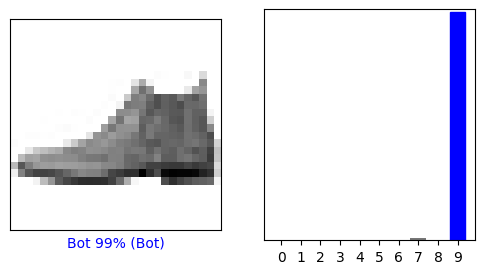

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

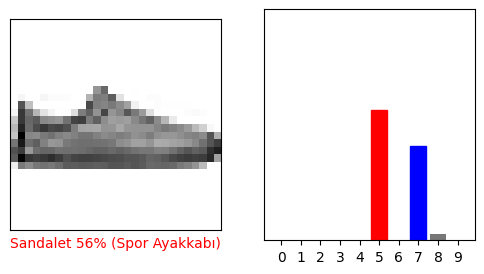

In [17]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()